# train new model with selected features and revert log transformation

In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import scipy as sp
from joblib import dump
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("cs1_part3_res.csv")

In [3]:
#include saleprice here
df = df[['lot_area', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'total_bsmt_sf', '2nd_flr_sf', 'gr_liv_area',
       'garage_yr_blt', 'garage_area', 'wood_deck_sf', 'open_porch_sf',
       'screen_porch','saleprice']]

C:\Users\Mellon\anaconda3\envs\NSSDC\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


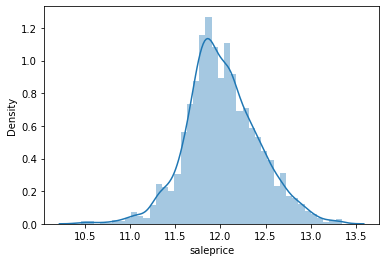

In [4]:
sns.distplot(df.saleprice);

# result of testing with deployment

index,actual,predicted,difference

2906, 70999.98292913866, 113441.06, 42442

2907, 150899.95900937598, 213214.95, 62315

2908, 188000.08254244438, 224813.55, 36813

2909, 159999.94492823596, 161209.56, 1210

2910, 130999.96911757377, 162663.79, 31664

2911, 142499.9577897737, 151870.90, 9371

2912, 130999.96911757377, 132991.46, 1992

2913, 132000.0293969709, 116182.95, -15818

2914, 170000.0682778486, 177016.31, 7016

2915, 188000.08254244438, 232543.53, 44543

In [5]:
df.tail(10)

,lot_area,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,total_bsmt_sf,2nd_flr_sf,gr_liv_area,garage_yr_blt,garage_area,wood_deck_sf,open_porch_sf,screen_porch,saleprice
2903,1894,1970,1970,0.0,252.0,546.0,546,1092,1970.0,286.0,0,24,0,11.170449
2904,12640,1976,1976,0.0,936.0,1728.0,0,1728,1976.0,574.0,40,0,0,11.924379
2905,9297,1976,1976,0.0,1606.0,1728.0,0,1728,1976.0,560.0,0,0,0,12.144203
2906,17400,1977,1977,0.0,936.0,1126.0,0,1126,1977.0,484.0,295,41,0,11.982935
2907,20000,1960,1996,0.0,1224.0,1224.0,0,1224,1960.0,576.0,474,0,0,11.782960
2908,7937,1984,1984,0.0,819.0,1003.0,0,1003,1984.0,588.0,120,0,0,11.867104
2909,8885,1983,1983,0.0,301.0,864.0,0,902,1983.0,484.0,164,0,0,11.782960
2910,10441,1992,1992,0.0,337.0,912.0,0,970,0.0,0.0,80,32,0,11.790565
2911,10010,1974,1975,0.0,1071.0,1389.0,0,1389,1975.0,418.0,240,38,0,12.043560
2912,9627,1993,1994,94.0,758.0,996.0,1004,2000,1993.0,650.0,190,48,0,12.144203


In [6]:
#testing purpose
x = np.expm1(11.924379)
print(x)

150899.95900937598


In [7]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

In [8]:
##Log transformation of sale price for whole training set
#decide to disable this and put it in the deployment instead
#x = np.expm1(y)
#df['saleprice'] = x

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
lasso_model = LassoCV()

In [12]:
lasso_model.fit(X_train,y_train)

LassoCV()

In [13]:
pred_test_lasso = lasso_model.predict(X_test)

In [14]:
#pred_test_lasso[pred_test_lasso<0] = 0

In [15]:
pred_test_lasso

array([12.18133612, 11.86562401, 12.63719301, 11.20236267, 11.09638377,
       11.84982579, 11.91987486, 11.97813974, 11.3788527 , 12.33531579,
       12.11999326, 11.74391766, 12.28570733, 11.66747   , 12.1741101 ,
       12.79366332, 12.28135586, 11.9408562 , 12.34143115, 12.24607327,
       12.15741845, 12.11658662, 11.69496098, 11.70907257, 11.73830329,
       11.72023448, 12.16501449, 11.60336765, 11.91880179, 12.39904815,
       12.11001129, 12.03162454, 11.7326772 , 11.75587922, 11.70828326,
       12.62835544, 11.74245025, 11.86124569, 11.33735259, 12.26157848,
       11.63731476, 12.56444849, 11.9021544 , 11.80643649, 11.38094161,
       11.61704436, 12.18346721, 11.98661272, 11.80288742, 11.6477503 ,
       11.94208256, 11.99576493, 11.93007294, 11.69248595, 11.38426706,
       12.42314994, 11.94038968, 12.80535958, 12.1755899 , 11.87576688,
       12.14165851, 11.48818271, 11.7816222 , 11.75710511, 11.326056  ,
       12.68972072, 12.61144481, 11.83177829, 11.49239158, 11.76

In [16]:
MAE_Lasso = mean_absolute_error(y_test,pred_test_lasso)
MSE_Lasso = mean_squared_error(y_test,pred_test_lasso)
RMSE_Lasso = np.sqrt(MSE_Lasso)

In [17]:
MAE_Lasso

0.11060872100592671

In [18]:
MSE_Lasso

0.02487058218309749

In [19]:
RMSE_Lasso

0.1577040969128497

In [20]:
def MAPE(y_test,pred_test_lasso):
    mape = np.mean(np.abs((y_test - pred_test_lasso)/y_test))*100
    return mape

In [21]:
LR_MAPElassocv= MAPE(y_test,pred_test_lasso)

In [22]:
print("lassocv MAPE: ",LR_MAPElassocv)

lassocv MAPE:  0.9269868757900545


In [23]:
accuracy= round(r2_score(y_test, pred_test_lasso), 2)
accuracy = accuracy * 100
accuracy

83.0

In [24]:
test_pred=y_test-pred_test_lasso

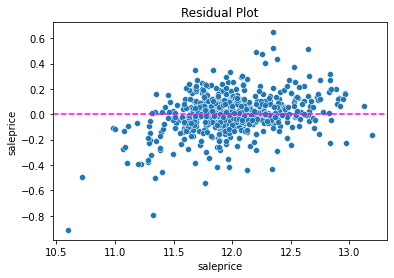

In [25]:
sns.scatterplot(x=y_test,y=test_pred)
plt.axhline(y=0,color='magenta',linestyle='--')
plt.title('Residual Plot');

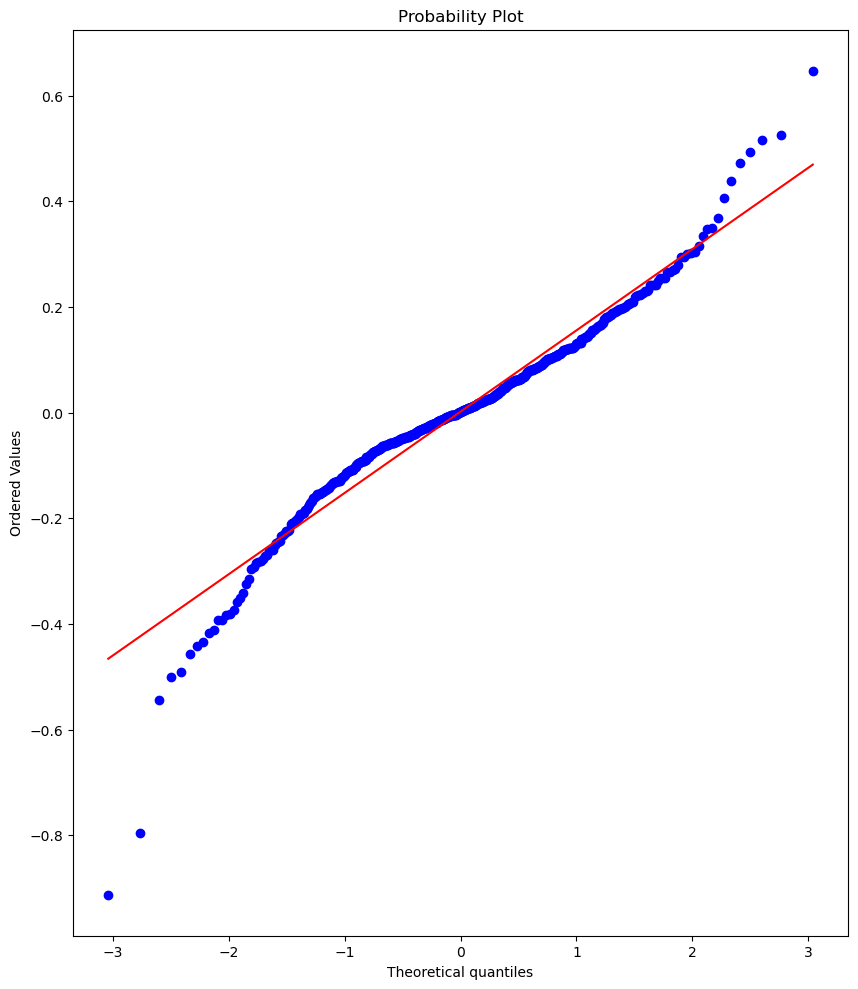

In [26]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(test_pred,plot=ax)

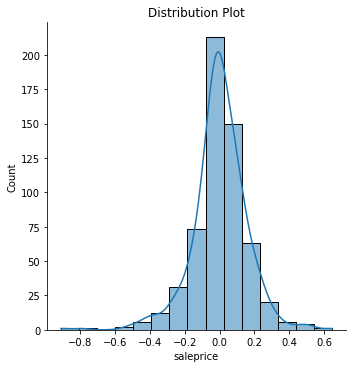

In [27]:
sns.displot(test_pred,bins=15,kde=True)
plt.title('Distribution Plot');

In [28]:
lasso_model.coef_

array([0.02125373, 0.08227359, 0.08063655, 0.01205017, 0.04178357,
       0.07985873, 0.00514459, 0.15677365, 0.02870541, 0.04346349,
       0.01536996, 0.00636704, 0.0189593 ])

In [29]:
dump(scaler,"cs1_Ames_Housing_scaler.pkl")

['cs1_Ames_Housing_scaler.pkl']

In [30]:
dump(lasso_model,"cs1_Ames_Housing_model.h5")

['cs1_Ames_Housing_model.h5']

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913 entries, 0 to 2912
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lot_area        2913 non-null   int64  
 1   year_built      2913 non-null   int64  
 2   year_remod/add  2913 non-null   int64  
 3   mas_vnr_area    2913 non-null   float64
 4   bsmtfin_sf_1    2913 non-null   float64
 5   total_bsmt_sf   2913 non-null   float64
 6   2nd_flr_sf      2913 non-null   int64  
 7   gr_liv_area     2913 non-null   int64  
 8   garage_yr_blt   2913 non-null   float64
 9   garage_area     2913 non-null   float64
 10  wood_deck_sf    2913 non-null   int64  
 11  open_porch_sf   2913 non-null   int64  
 12  screen_porch    2913 non-null   int64  
 13  saleprice       2913 non-null   float64
dtypes: float64(6), int64(8)
memory usage: 318.7 KB
